In [3]:
import pandas as pd

df = pd.read_csv('/content/sample_data/california_housing_train.csv')
display(df.head())
display(df.info())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


None

In [10]:
features = df[['median_income']]
target = df['median_house_value']
display(features.head())
display(target.head())

,median_income
0,1.4936
1,1.8200
2,1.6509
3,3.1917
4,1.9250


,median_house_value
0,66900.0
1,80100.0
2,85700.0
3,73400.0
4,65500.0


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
print(model.predict(X_test))


[197698.01698159 224945.88226211 511632.41054974 ... 167240.56658322
 221101.94197046 134905.25682926]


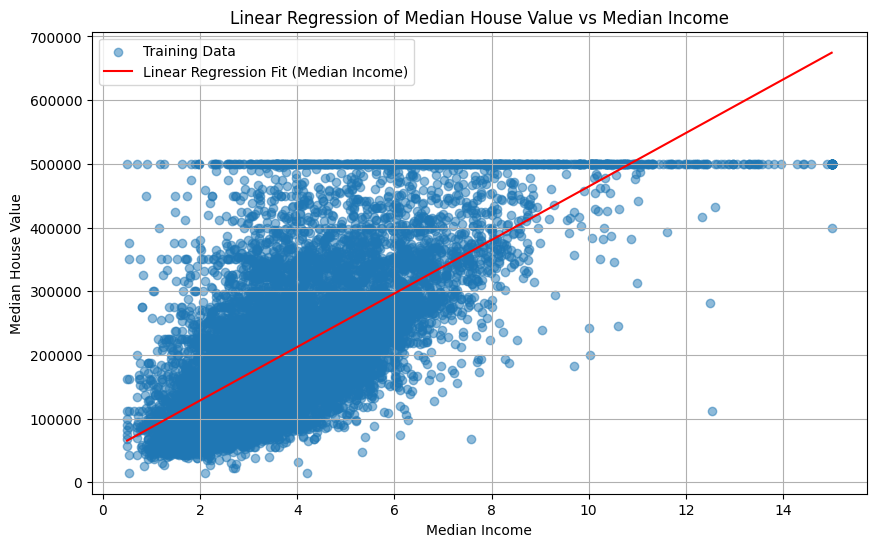

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Extract median_income and median_house_value from the training data
X_train_income = X_train['median_income'].values.reshape(-1, 1)
y_train_value = y_train.values

# Train a linear regression model specifically for median_income vs median_house_value
model_income = LinearRegression()
model_income.fit(X_train_income, y_train_value)

# Generate points for the regression line
x_plot = np.linspace(X_train_income.min(), X_train_income.max(), 100).reshape(-1, 1)
y_plot = model_income.predict(x_plot)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_train_income, y_train_value, alpha=0.5, label='Training Data')

# Plot the regression line
plt.plot(x_plot, y_plot, color='red', label='Linear Regression Fit (Median Income)')

plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Linear Regression of Median House Value vs Median Income')
plt.legend()
plt.grid(True)
plt.show()